In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Выкладки

$X_{i} = a + \epsilon \text{, где }\epsilon\sim N(0,\sigma^{2})$

$\theta = a$

$Z_{n\times1} = \begin{pmatrix}
1\\
1\\         
\vdots\\
1\end{pmatrix}$

$Z^{T}Z = n$

$A = (Z^{T}Z)^{-1}$

$\hat{\theta} = (Z^{T}Z)^{-1}Z^{T}X = \overline{X}$

## Точный ДИ уровня доверия $\gamma$ для $\sigma^{2}$ при неизвестном $a$

$\frac{1}{\sigma^{2}}||X - Z\hat{\theta}||^{2}\sim \chi_{n - k}^{2}$

$(0; \frac{1}{u_{1 - \gamma}}||X - Z\hat{\theta}||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

$(0; \frac{1}{u_{1 - \gamma}}||X - Z\overline{X}||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

## Точный ДИ уровня доверия $\gamma$  для $a$ при неизвестном $\sigma^{2}$

$\frac{(\hat{\theta_{i}} - \theta_{i})\sqrt{n - k}}{\sqrt{a_{ii}}||X - Z\hat{\theta}||^{2}}\sim T_{n - k}$

$(\hat{\theta_{i}} - u_{\frac{1 + \gamma}{2}}\sqrt{\frac{a_{ii}}{n - k}}||X - Z\hat{\theta}||^{2}; \hat{\theta_{i}} - u_{\frac{1 - \gamma}{2}}\sqrt{\frac{a_{ii}}{n - k}}||X - Z\hat{\theta}||^{2}) \text{, где }u_{\gamma} \text{ - } \gamma \text{ - квантиль } T_{n - 1}$

$(\overline{X} - u_{\frac{1 + \gamma}{2}}\frac{||X - Z\overline{X}||^{2}}{\sqrt{n(n - 1)}}; \overline{X} - u_{\frac{1 - \gamma}{2}}\frac{||X - Z\overline{X}||^{2}}{\sqrt{n(n - 1)}}) \text{, где }u_{\gamma} \text{ - } \gamma \text{ - квантиль } T_{n - 1}$

## Точный ДИ уровня доверия $\gamma$  для $a$ при известном $\sigma^{2}$

$\frac{\hat{\theta_{i}} - \theta_{i}}{\sigma \sqrt{a_{ii}}}\sim N(0, 1)$

$(\hat{\theta_{i}} - u_{\frac{1 + \gamma}{2}}\sigma \sqrt{a_{ii}}; \hat{\theta_{i}} - u_{\frac{1 - \gamma}{2}}\sigma \sqrt{a_{ii}})\text{, где }u_{\gamma}\text{ - }\gamma\text{-квантиль }N(0, 1)$

$(\overline{X} - u_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}} \leq a \leq \overline{X} + u_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}})\text{, где }u_{\gamma}\text{ - }\gamma\text{-квантиль }N(0, 1)$

## Точный ДИ уровня доверия $\gamma$ для $\sigma^{2}$ при известном $a$

$\frac{1}{\sigma^{2}}||X - Za||^{2}\sim \chi_{n - k}^{2}$

$(0; \frac{1}{u_{1 - \gamma}}||X - Za||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

$(0; \frac{1}{u_{1 - \gamma}}||X - Za||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

# Вычисления

In [2]:
def print_graphic(sample, theta, Z, gamma, a, sigma, name, title, func, y_min, y_max):
    
    first, second = func(sample, theta, Z, gamma, a, sigma)
    n = np.arange(0, sample.size, 1)

    plt.figure(figsize=(15, 8))
    plt.scatter(n, sample, alpha=0.2, s=20, label='sample')  # s - размер точек
    
    plt.plot(n, np.ones_like(n)*theta, color='red', linewidth=2, label=str(name))
    
    # заполняет пространство между двумя функциями
    plt.fill_between(np.array(n), np.array(second), np.array(first), alpha=0.1, label='Interval')
    plt.legend()
    # plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
    plt.ylim((y_min, y_max))  # размеры графика по вертикальной оси 
    plt.xlabel('n')  # название горизонтальной оси (аналогично plt.ylabel)
    plt.title(str(title))  # имя графика
    plt.grid()  # добавляем сетку
    plt.show()

In [3]:
N = 100
gamma = 0.95

In [4]:
Z = np.ones(N).reshape(N, 1)

## Точный ДИ уровня доверия $\gamma$ для $\sigma^{2}$ при неизвестном $a$

$(0; \frac{1}{u_{1 - \gamma}}||X - Z\overline{X}||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

In [5]:
def get_interval_for_sigma_without_a(sample, theta, Z, gamma, a, sigma):
    sample = sample.reshape(sample.size, 1)
    first = np.zeros(sample.size)
    second = np.zeros(sample.size)
    
    for i in xrange(sample.size):
        second[i] = np.transpose(sample[:(i + 1)] - Z[:(i + 1)]*np.mean(sample[:(i + 1)])).\
                             dot(sample[:(i + 1)] - Z[:(i + 1)]*np.mean(sample[:(i + 1)]))/\
                    sts.chi2(i).ppf(1 - gamma)
    
    return first, second

In [6]:
a = 0
sigma = 1
X = sts.norm(a, sigma).rvs(N)
theta = sigma

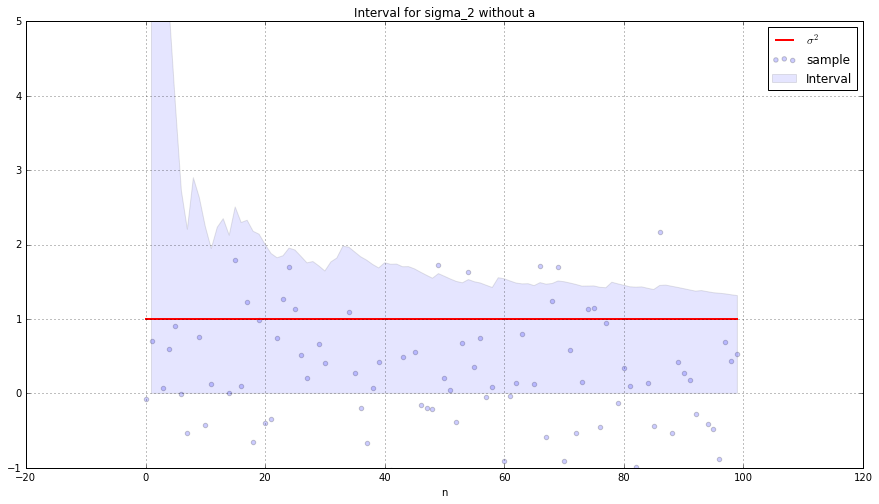

In [7]:
print_graphic(X, theta, Z, gamma, a, sigma, '$\\sigma^{2}$', 'Interval for sigma_2 without a', \
              get_interval_for_sigma_without_a, -1 , 5)

## Точный ДИ уровня доверия $\gamma$  для $a$ при неизвестном $\sigma^{2}$

$(\overline{X} - u_{\frac{1 + \gamma}{2}}\frac{||X - Z\overline{X}||^{2}}{\sqrt{n(n - 1)}}; \overline{X} - u_{\frac{1 - \gamma}{2}}\frac{||X - Z\overline{X}||^{2}}{\sqrt{n(n - 1)}}) \text{, где }u_{\gamma} \text{ - } \gamma \text{ - квантиль } T_{n - 1}$

In [8]:
def get_interval_for_a_without_sigma(sample, theta, Z, gamma, a, sigma):
    sample = sample.reshape(sample.size, 1)
    first = np.zeros(sample.size)
    second = np.zeros(sample.size)
    
    for i in xrange(sample.size):
        frac = np.transpose(sample[:(i + 1)] - Z[:(i + 1)]*np.mean(sample[:(i + 1)])).\
                             dot(sample[:(i + 1)] - Z[:(i + 1)]*np.mean(sample[:(i + 1)]))/\
                np.sqrt((i + 1)*i)
        first[i] = np.mean(sample[:(i + 1)]) - frac*sts.t(i).ppf((1. + gamma)/2)
        second[i] = np.mean(sample[:(i + 1)]) - frac*sts.t(i).ppf((1. - gamma)/2)
    
    return first, second

In [9]:
theta = a

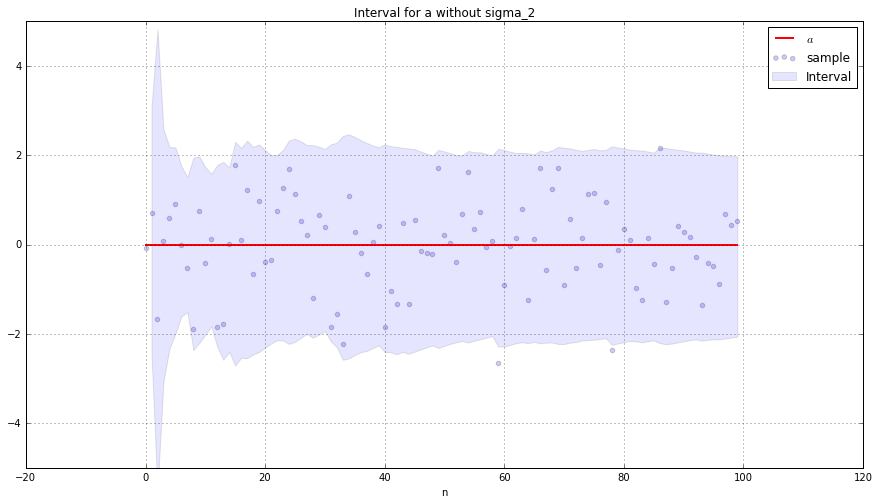

In [10]:
print_graphic(X, theta, Z, gamma, a, sigma, '$a$', 'Interval for a without sigma_2', \
              get_interval_for_a_without_sigma, -5 , 5)

## Точный ДИ уровня доверия $\gamma$  для $a$ при известном $\sigma^{2}$

$(\overline{X} - u_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}} \leq a \leq \overline{X} + u_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}})\text{, где }u_{\gamma}\text{ - }\gamma\text{-квантиль }N(0, 1)$

In [11]:
def get_interval_for_a_with_sigma(sample, theta, Z, gamma, a, sigma):
    sample = sample.reshape(sample.size, 1)
    first = np.zeros(sample.size)
    second = np.zeros(sample.size)
    
    for i in xrange(sample.size):
        first[i] = np.mean(sample[:(i + 1)]) - sts.norm(a, sigma).ppf((1. + gamma)/2)*float(sigma)/np.sqrt(i + 1)
        second[i] = np.mean(sample[:(i + 1)]) - sts.norm(a, sigma).ppf((1. - gamma)/2)*float(sigma)/np.sqrt(i + 1)
    
    return first, second

In [12]:
theta = a

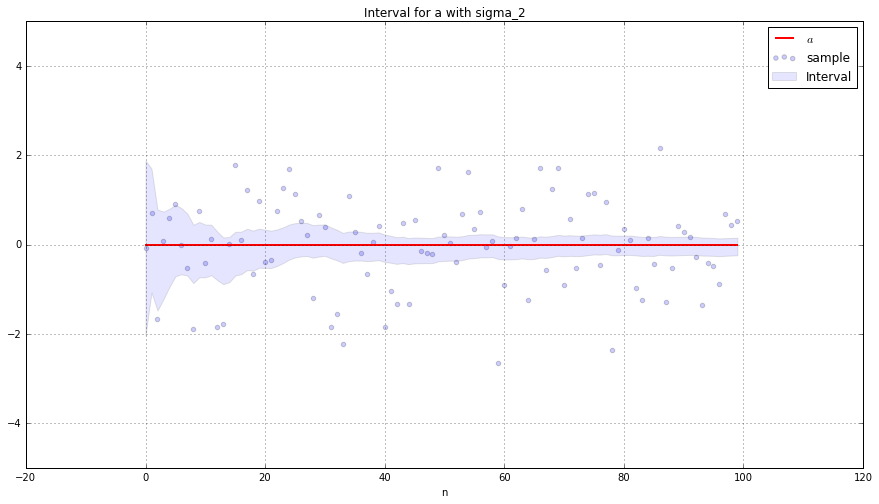

In [13]:
print_graphic(X, theta, Z, gamma, a, sigma, '$a$', 'Interval for a with sigma_2', \
              get_interval_for_a_with_sigma, -5 , 5)

## Точный ДИ уровня доверия $\gamma$ для $\sigma^{2}$ при известном $a$

$(0; \frac{1}{u_{1 - \gamma}}||X - Za||^{2}) \text{, где }u_{1 - \gamma} \text{ - } (1 - \gamma) \text{ - квантиль } \chi_{n - 1}^{2}$

In [14]:
def get_interval_for_sigma_with_a(sample, theta, Z, gamma, a, sigma):
    sample = sample.reshape(sample.size, 1)
    first = np.zeros(sample.size)
    second = np.zeros(sample.size)
    
    for i in xrange(sample.size):
        second[i] = np.transpose(sample[:(i + 1)] - Z[:(i + 1)]*a).\
                             dot(sample[:(i + 1)] - Z[:(i + 1)]*a)/\
                    sts.chi2(i).ppf(1 - gamma)
    
    return first, second

In [15]:
theta = sigma

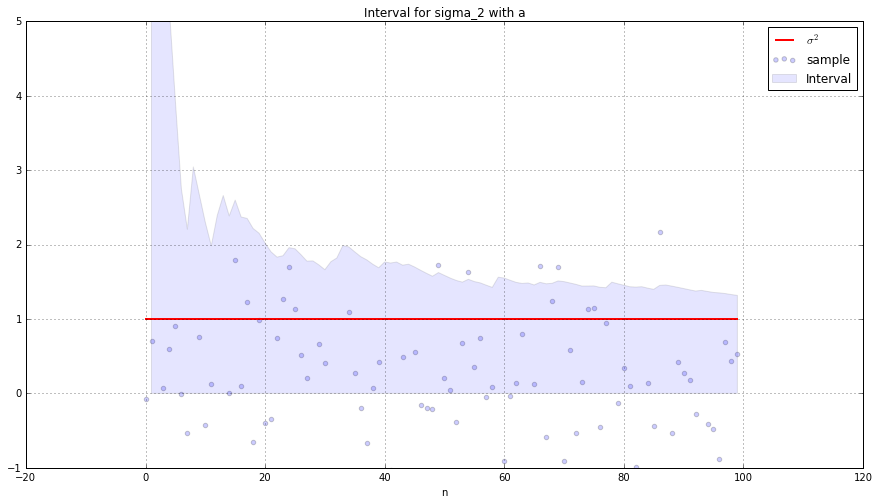

In [16]:
print_graphic(X, theta, Z, gamma, a, sigma, '$\\sigma^{2}$', 'Interval for sigma_2 with a', \
              get_interval_for_sigma_with_a, -1 , 5)

## Вывод

В случае известного $\sigma$ ДИ для $а$ получаются точнее чем в случае неизвестного. ДИ для $\sigma$ отличаются не значительно, поскольку $\overline{X}$ достаточно точно оценивает $a$.